# Oscilador Armónico simple


## 1. Oscilador armónico simple

La fuerza restauradora en un pendulo simple se puede expresar como
$$
F_{\theta} = -mg\sin(\theta)
$$

Se usa la aproximación para ángulos pequeños $\sin(\theta) \approx \theta$. De manera que la ecuación de movimiento se expresa como:

\begin{equation}
    \ddot \theta = -\frac{g}{l}\theta
    \label{OAS}
\end{equation}

Cuya solución analítica tiene la forma:
$$
\theta = \theta_0 \sin(\Omega t + \phi)
$$

donde $\Omega = \sqrt{g/l}$, $\theta_0$ es la amplitud y $\phi$ la fase.

Ahora se considera un enfoque numérico al problema. Para resolver la ecuación diferencial de segundo orden se transforma en un sistema de dos ecuaciones de primer orden:

\begin{align}
\begin{cases}
    \dot \omega &= -\dfrac{g}{l}\theta\\
    \dot \theta &= \omega
\end{cases}
\end{align}

### Diagrama de fase

* Gráfico de $\theta$ contra $\omega$. 
* Desde el punto de vista dinámico, las variables $\theta$ y $\omega$ determinan el estado del sistema. Por lo tanto, 
* se pude considerar que $\theta$ y $\omega$ representan las coordenadas de un punto en un _espacio de fase_. 
* La evolución temporal del sistema se representa en este gráfico como una trayectoria. 
* Cada set de condiciones iniciales determinan una trayecoria distinta.
* Al conjunto de todas las posibles trayectorias del sistema se le conoce como el _diagrama de fase_ del oscilador armónico.


### Uso de `scipy.integrate.solve_ivp()`

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

solve_ivp?

Signature:
solve_ivp(
    fun,
    t_span,
    y0,
    method='RK45',
    t_eval=None,
    dense_output=False,
    events=None,
    vectorized=False,
    args=None,
    **options,
)
Docstring:
Solve an initial value problem for a system of ODEs.

This function numerically integrates a system of ordinary differential
equations given an initial value::

    dy / dt = f(t, y)
    y(t0) = y0

Here t is a 1-D independent variable (time), y(t) is an
N-D vector-valued function (state), and an N-D
vector-valued function f(t, y) determines the differential equations.
The goal is to find y(t) approximately satisfying the differential
equations, given an initial value y(t0)=y0.

Some of the solvers support integration in the complex domain, but note
that for stiff ODE solvers, the right-hand side must be
complex-differentiable (satisfy Cauchy-Riemann equations [11]_).
To solve a problem in the complex domain, pass y0 with a complex data type.
Another option always available is to rewrite your pro

### Ejemplo: Movimiento de un proyectil

Ecuaciones de movimiento:

\begin{align}
\begin{cases}
    \dot x &= v_x\\
    \dot v_x &= 0 \\
    \dot y &= v_y\\
    \dot v_y &= 0\\
    \dot z &= v_z\\
    \dot v_z &= -g
\end{cases}
\end{align}

In [2]:
def Proyectil_Ideal(t, estado, g):
    """
    Función que calcula la dinámica del movimiento del projectil en tres dimensiones
    El modelo no toma en cuenta resistencia ni fuerza externa
    """
    x, vx, y, vy, z, vz = estado
    
    dx = vx
    dvx = 0.
    dy = vy
    dvy = 0.
    dz = vz
    dvz = -g
    
    return [dx, dvx, dy, dvy, dz, dvz]

# Parámetros del modelo
g = 9.81
p = (g,)

# Condiciones iniciales del sistema
xi = 0
vxi = 50
yi = 0
vyi = 50
zi = 0
vzi = 400

cond_iniciales = [xi, vxi, yi, vyi, zi, vzi]

# Intervalo temporal
t_span = (0.0, 85.0)
t_eval = np.arange(0, 85, 2)

# Uso de solve_ivp()
result_solve_ivp = solve_ivp(Proyectil_Ideal, t_span, y0=cond_iniciales, t_eval=t_eval, args=p)

print(result_solve_ivp)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0  2 ... 82 84]
        y: [[ 0.000e+00  1.000e+02 ...  4.100e+03  4.200e+03]
            [ 5.000e+01  5.000e+01 ...  5.000e+01  5.000e+01]
            ...
            [ 0.000e+00  7.804e+02 ... -1.812e+02 -1.010e+03]
            [ 4.000e+02  3.804e+02 ... -4.044e+02 -4.240e+02]]
      sol: None
 t_events: None
 y_events: None
     nfev: 56
     njev: 0
      nlu: 0


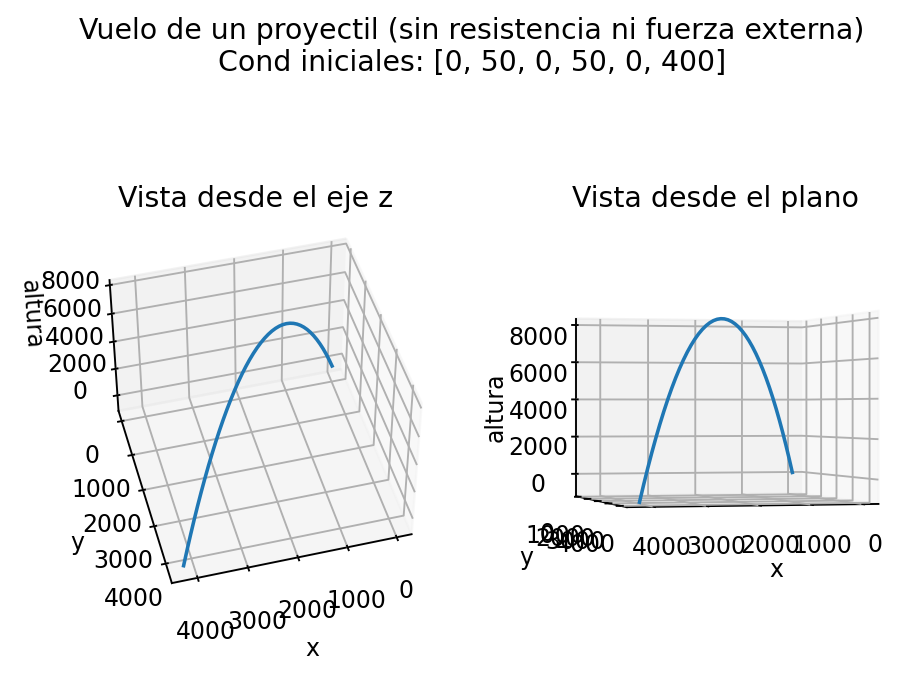

In [3]:
fig, (ax, ax1) = plt.subplots(1, 2, dpi=170, subplot_kw=dict(projection='3d'))

ax.view_init(45, 75)
ax.plot(result_solve_ivp.y[0, :], result_solve_ivp.y[2, :], result_solve_ivp.y[4, :])
ax.set_title('Vista desde el eje z')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('altura')

ax1.view_init(0, 75)
ax1.plot(result_solve_ivp.y[0, :], result_solve_ivp.y[2, :], result_solve_ivp.y[4, :])
ax1.set_title('Vista desde el plano')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('altura')

plt.suptitle('Vuelo de un proyectil (sin resistencia ni fuerza externa)\nCond iniciales: {}' \
             .format(cond_iniciales))
plt.show()

## Gráficas resultantes del OAS

### Solución analítica vs solución numérica

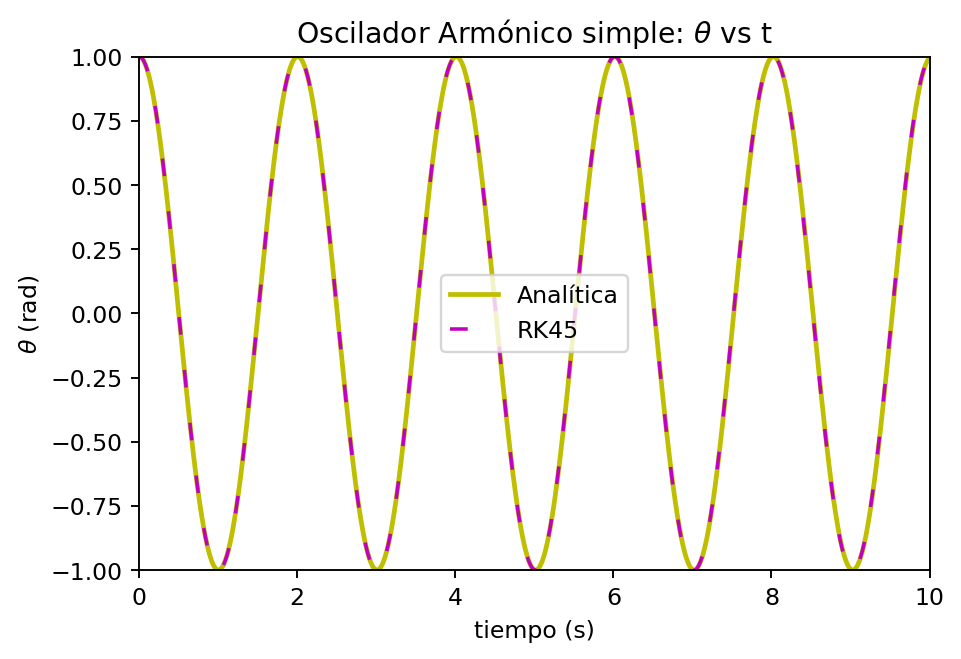

### Diagrama de fase

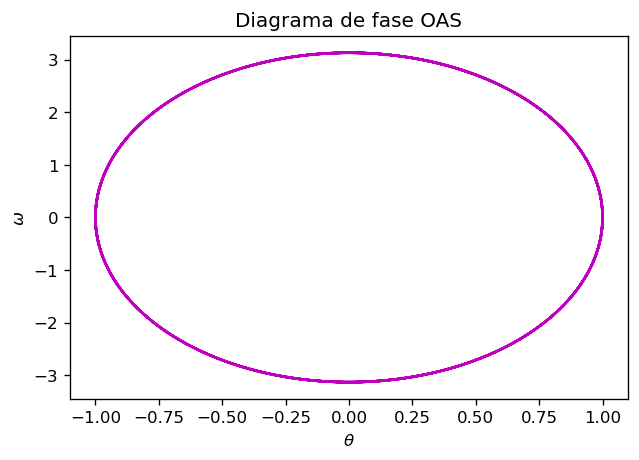

## 2. Oscilador armónico amortiguado

Para caso del oscilador amortiguado se va a tomar en cuenta que la fricción es proporcional a la rapidez del oscilador.

$$
F_{fricción} = -q \dot \theta
$$

Por lo tanto, la ecuación de movimiento se expresa como:
$$
\ddot \theta = -\frac{g}{l}\theta - q \dot \theta
$$

Esta ecuación se expresa como el siguiente sistema de ecuaciones:
\begin{align}
\begin{cases}
    \dot \omega &= -\dfrac{g}{l}\theta -q\omega\\
    \dot \theta &= \omega
\end{cases}
\end{align}

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0  2 ... 82 84]
        y: [[ 5.000e+00  3.695e+01 ...  2.034e+36  1.502e+37]
            [ 1.000e+01  7.390e+01 ...  4.068e+36  3.005e+37]
            [ 1.000e+01  7.390e+01 ...  4.068e+36  3.005e+37]
            [ 1.000e+01 -5.977e+02 ... -3.868e+37 -2.857e+38]]
      sol: None
 t_events: None
 y_events: None
     nfev: 380
     njev: 0
      nlu: 0
[5.00000000e+00 3.69500662e+01 2.72842239e+02 2.01713876e+03
 1.48915021e+04 1.10076066e+05 8.13125741e+05 6.00569467e+06
 4.43968171e+07 3.27709818e+08 2.42278335e+09 1.78907772e+10
 1.32204973e+11 9.76957658e+11 7.21288573e+12 5.33289989e+13
 3.93671180e+14 2.91006838e+15 2.14957522e+16 1.58773359e+17
 1.17369420e+18 8.66354658e+18 6.40510559e+19 4.72961690e+20
 3.49511680e+21 2.58269527e+22 1.90686754e+23 1.40984945e+24
 1.04072201e+25 7.69328394e+25 5.68261140e+26 4.19751336e+27
 3.10282632e+28 2.29035335e+29 1.693

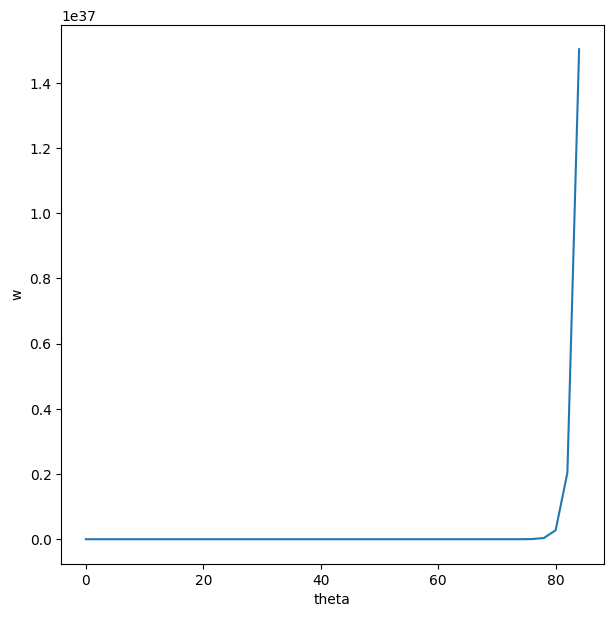

In [4]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt


# Definición de la función

def Oscilador_Armonico(t, estado, g,l,q):
    
    theta, w, dtheta, dw = estado
    
    dw = -((g*theta)/(l)) -q*w
    dtheta = w

    return np.array([theta,w,dtheta,dw])




# Parámetros del modelo
g = -9.81
q = 10
l = 10

p = (g,q,l)

# Condiciones iniciales del sistema
theta0 = 5
w0 = 10
dtheta0 = 10
dw0 = 10

cond_iniciales = [theta0, w0, dtheta0, dw0]

# Intervalo temporal
#t = np.linspace(0, 10, 100)

t_span = (0.0, 85.0)
t_eval = np.arange(0, 85, 2)


# Uso de solve_ivp
sol = solve_ivp(Oscilador_Armonico, t_span = t_span, y0 = cond_iniciales, t_eval = t_eval, args = p)

print(sol)
sol_theta = sol.y[0,:]
print(sol_theta)
sol_w = sol.y[1,:]

# Graficación

fig, ax = plt.subplots(figsize=(7,7))
plt.plot(t_eval, sol_theta, label='Solución Armónico')

plt.xlabel('theta')
plt.ylabel('w')
plt.show()


Text(0.5, 1.0, 'Oscilador Armónico Simple')

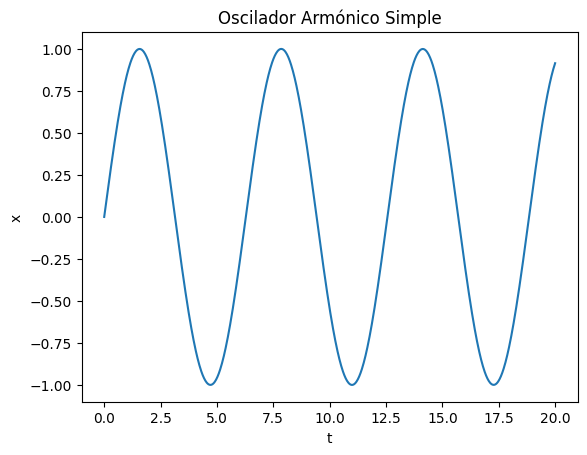

In [5]:
import numpy as np 
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt


# Se define la función f, que toma de parámetros el tiempo y la tupla [x,v]
def f(t,y):
    # La solución corresponde a un vector con v (dx) en la posición 0, y dv en la posición 1
    sol = [y[1],-omega_cuad*y[0]]
    return sol



# Se establece un rango de t, de 0 a 20 en 1000 steps
t = np.linspace(0,20,1000)

# Se define omega cuadrado, que es k/m (escenario de un resorte)
omega_cuad = 1

# Se definen los valores iniciales para x y v, en una tupla 
y = [0,1]

# Se resuelve la función 
sho = solve_ivp(f, [0,1000], y0 = y, t_eval = t)

plt.plot(t,sho.y[0])
plt.ylabel("x")
plt.xlabel("t")
plt.title('Oscilador Armónico Simple')

In [6]:

"""
#Definir la función
def f(t, estado, k, m):

    x, v, dx, dv  = estado
    
    dx = v
    dv = -k/m * x
    
    return np.array([x, v, dx, dv])

# Parámetros del modelo
k = 1
m = 1
p = (k,m)

# Condiciones iniciales del sistema
xi  = 0.1
vi  = 0
dxi = vi
dvi = -9.81

cond_iniciales = [xi, vi, dxi, dvi]

# Intervalo temporal
t = np.linspace(0, 10, 100)

# Uso de solve_ivp
sol = solve_ivp(f, t_span = (0,10), y0 = cond_iniciales, t_eval = t, args = p)
x = sol.y[0,:]


# Graficación

fig, ax = plt.subplots(figsize=(7,7), dpi=100)
plt.plot(t, x, color='r', label='Solución del armónico')

plt.title('Gráfico 1')
plt.xlabel('t')
plt.ylabel('cita')
plt.show()
"""

"\n#Definir la función\ndef f(t, estado, k, m):\n\n    x, v, dx, dv  = estado\n    \n    dx = v\n    dv = -k/m * x\n    \n    return np.array([x, v, dx, dv])\n\n# Parámetros del modelo\nk = 1\nm = 1\np = (k,m)\n\n# Condiciones iniciales del sistema\nxi  = 0.1\nvi  = 0\ndxi = vi\ndvi = -9.81\n\ncond_iniciales = [xi, vi, dxi, dvi]\n\n# Intervalo temporal\nt = np.linspace(0, 10, 100)\n\n# Uso de solve_ivp\nsol = solve_ivp(f, t_span = (0,10), y0 = cond_iniciales, t_eval = t, args = p)\nx = sol.y[0,:]\n\n\n# Graficación\n\nfig, ax = plt.subplots(figsize=(7,7), dpi=100)\nplt.plot(t, x, color='r', label='Solución del armónico')\n\nplt.title('Gráfico 1')\nplt.xlabel('t')\nplt.ylabel('cita')\nplt.show()\n"